In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
train = pd.read_csv("data-train.csv",index_col=0)
test = pd.read_csv("data-test.csv",index_col=0)

In [3]:
train.head()

,productID,brandID,attribute1,attribute2,attribute3,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel,sales
0,28,4,3,100,5,2.098131,749,58.870968,53.774194,24.642857,3,31.481481,0.370370,3.222222,0.555556,0.357143,2.259259,3.178571,1.884615,31
1,73,30,2,40,3,1.487173,1217,329.000000,146.111111,8.642857,5,30.000000,0.000000,3.333333,0.571429,0.333333,2.285714,3.000000,2.000000,9
2,70,3,3,100,1,2.726300,3676,105.000000,64.797872,32.500000,2,32.027778,0.194444,3.073529,0.611940,0.320000,2.223881,2.866667,2.000000,94
3,69,35,3,100,2,2.831175,2685,246.482759,204.448276,43.714286,5,32.160000,0.280000,3.125000,0.480000,0.357143,2.160000,3.357143,1.833333,29
4,69,35,3,100,7,6.322161,777,250.000000,240.500000,43.000000,6,26.666667,0.000000,3.333333,0.000000,0.500000,2.000000,2.750000,1.333333,4


# Drop NA

In [4]:
train.shape

(2314, 20)

In [5]:
test.shape

(1543, 19)

In [6]:
train.dropna()
test.dropna()

,productID,brandID,attribute1,attribute2,attribute3,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,weekday,meanAge,gender,meanEducation,maritalStatus,plus,meanPurchasePower,meanUserLevel,meanCityLevel
0,0,4,3.0,90.0,2,15.410308,644.0,129.0,127.428571,7.571429,4,36.000000,0.142857,3.333333,0.666667,0.285714,2.000000,2.571429,2.833333
1,88,36,4.0,100.0,1,4.415871,198.0,249.9,135.666667,3.285714,5,40.666667,0.333333,2.500000,0.333333,0.000000,2.000000,2.000000,3.333333
2,82,11,3.0,100.0,2,9.012597,552.0,99.0,49.000000,222.285714,3,20.000000,0.000000,3.000000,0.000000,0.000000,2.000000,2.000000,3.000000
3,38,14,3.0,80.0,3,17.763691,1319.0,79.0,68.454545,18.642857,7,28.666667,0.600000,2.571429,0.533333,0.142857,2.666667,2.047619,3.000000
4,21,26,2.0,50.0,5,2.248642,851.0,69.9,55.733333,5.357143,7,32.105263,0.421053,2.894737,0.421053,0.095238,2.210526,2.761905,1.947368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,43,12,3.0,60.0,1,8.618363,277.0,139.0,66.657143,13.428571,5,33.333333,0.333333,3.000000,0.600000,0.285714,2.000000,3.000000,2.166667
1539,36,19,3.0,60.0,5,2.729973,694.0,119.0,60.321951,23.071429,7,30.387097,0.225806,3.071429,0.607143,0.303030,2.214286,2.666667,2.032258
1540,24,26,2.0,50.0,2,2.342957,941.0,94.9,94.900000,14.500000,6,32.500000,0.500000,2.750000,0.500000,0.250000,2.000000,2.250000,2.250000
1541,36,19,3.0,60.0,2,23.102118,188.0,119.0,71.900000,6.714286,2,27.500000,0.125000,3.125000,0.625000,0.000000,2.375000,1.666667,2.714286


In [7]:
train.shape

(2314, 20)

In [8]:
test.shape

(1543, 19)

#### There seem to be no NA data

# Drop response from train dataset

In [9]:
X_train=train.drop('sales',axis=1)
Y_train=train.sales

# Data Exploration (Non-overlapping Categorical Variables)

In [10]:
train.nunique()

productID                 76
brandID                   30
attribute1                 4
attribute2                 7
attribute3                33
attribute4              2314
clickVolume             1244
avgOriginalUnitPrice     386
avgFinalUnitPrice       1938
ma14SalesVolume          769
weekday                    7
meanAge                  726
gender                   371
meanEducation            408
maritalStatus            353
plus                     381
meanPurchasePower        363
meanUserLevel            675
meanCityLevel            492
sales                    159
dtype: int64

In [11]:
test.nunique()

productID                 76
brandID                   30
attribute1                 4
attribute2                 7
attribute3                28
attribute4              1543
clickVolume              959
avgOriginalUnitPrice     313
avgFinalUnitPrice       1324
ma14SalesVolume          642
weekday                    7
meanAge                  536
gender                   273
meanEducation            315
maritalStatus            277
plus                     288
meanPurchasePower        278
meanUserLevel            518
meanCityLevel            378
dtype: int64

#### Observation: For Attribute 3 (Likely categorical), train data has 33 unique values while test data has 28 unique values.

# Data Exploration $Y_{train}$

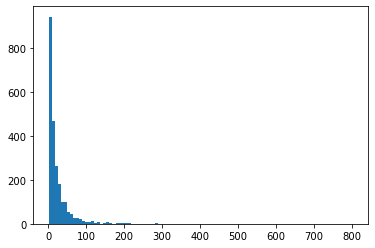

In [12]:
plt.hist(Y_train,bins=100)
plt.show()

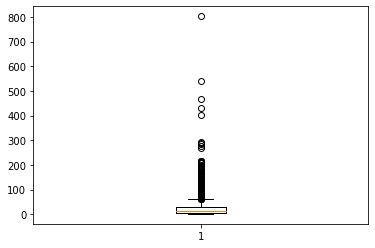

In [13]:
plt.boxplot(Y_train)
plt.show()

In [14]:
Y_train.max()

803

In [15]:
Y_train.mean()

24.29040622299049

#### Observation: There are many extreme range of sales values, log(sales) as a response variable would be appropriate

# Log(Sales)

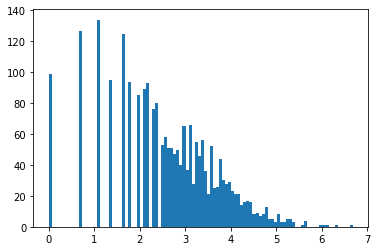

In [16]:
plt.hist(np.log(Y_train),bins=100)
plt.show()

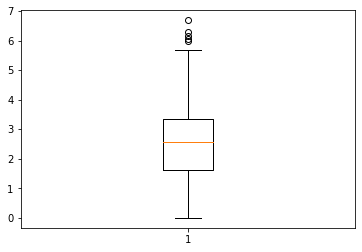

In [17]:
plt.boxplot(np.log(Y_train))
plt.show()

#### Log(Sales) will be used as response

In [18]:
Y_train_log = np.log(Y_train)

# Combine Test and Train dataset

In [19]:
Combine = pd.concat([X_train,test])

# Convert categorical predictors to String to be used in One-Hot-Encoder

## Categorical Predictors
#### 1. Weekday
#### 2. product_ID
#### 3. brand_ID
#### 4. Attribute1/2/3

In [20]:
Combine.weekday=Combine.weekday.astype(str)
Combine.productID=Combine.productID.astype(str)
Combine.brandID=Combine.brandID.astype(str)
Combine.attribute1=Combine.attribute1.astype(str)
Combine.attribute2=Combine.attribute2.astype(str)
Combine.attribute3=Combine.attribute3.astype(str)
Combine=pd.get_dummies(Combine)
Combine.head()

,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,attribute3_7,attribute3_8,attribute3_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,2.098131,749.0,58.870968,53.774194,24.642857,31.481481,0.370370,3.222222,0.555556,0.357143,...,0,0,0,0,0,1,0,0,0,0
1,1.487173,1217.0,329.000000,146.111111,8.642857,30.000000,0.000000,3.333333,0.571429,0.333333,...,0,0,0,0,0,0,0,1,0,0
2,2.726300,3676.0,105.000000,64.797872,32.500000,32.027778,0.194444,3.073529,0.611940,0.320000,...,0,0,0,0,1,0,0,0,0,0
3,2.831175,2685.0,246.482759,204.448276,43.714286,32.160000,0.280000,3.125000,0.480000,0.357143,...,0,0,0,0,0,0,0,1,0,0
4,6.322161,777.0,250.000000,240.500000,43.000000,26.666667,0.000000,3.333333,0.000000,0.500000,...,1,0,0,0,0,0,0,0,1,0


# Split back to train & test datasets

In [21]:
transformed_X_train = Combine.iloc[:train.shape[0]]
transformed_X_train

,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,attribute3_7,attribute3_8,attribute3_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,2.098131,749.0,58.870968,53.774194,24.642857,31.481481,0.370370,3.222222,0.555556,0.357143,...,0,0,0,0,0,1,0,0,0,0
1,1.487173,1217.0,329.000000,146.111111,8.642857,30.000000,0.000000,3.333333,0.571429,0.333333,...,0,0,0,0,0,0,0,1,0,0
2,2.726300,3676.0,105.000000,64.797872,32.500000,32.027778,0.194444,3.073529,0.611940,0.320000,...,0,0,0,0,1,0,0,0,0,0
3,2.831175,2685.0,246.482759,204.448276,43.714286,32.160000,0.280000,3.125000,0.480000,0.357143,...,0,0,0,0,0,0,0,1,0,0
4,6.322161,777.0,250.000000,240.500000,43.000000,26.666667,0.000000,3.333333,0.000000,0.500000,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,3.887282,1524.0,329.000000,148.333333,16.000000,23.888889,0.055556,3.000000,0.312500,0.222222,...,0,0,0,0,0,0,0,0,0,1
2310,10.585052,212.0,68.000000,39.142857,7.714286,35.000000,0.250000,3.250000,1.000000,0.400000,...,0,0,1,0,0,1,0,0,0,0
2311,13.982589,717.0,109.000000,63.000000,6.000000,29.090909,0.272727,3.000000,0.300000,0.181818,...,0,0,0,0,0,0,1,0,0,0
2312,2.236615,307.0,166.000000,134.000000,9.928571,30.000000,0.333333,2.666667,0.333333,0.333333,...,0,0,0,0,0,0,0,1,0,0


In [22]:
transformed_X_test = Combine.iloc[train.shape[0]:]
transformed_X_test

,attribute4,clickVolume,avgOriginalUnitPrice,avgFinalUnitPrice,ma14SalesVolume,meanAge,gender,meanEducation,maritalStatus,plus,...,attribute3_7,attribute3_8,attribute3_9,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weekday_7
0,15.410308,644.0,129.0,127.428571,7.571429,36.000000,0.142857,3.333333,0.666667,0.285714,...,0,0,0,0,0,0,1,0,0,0
1,4.415871,198.0,249.9,135.666667,3.285714,40.666667,0.333333,2.500000,0.333333,0.000000,...,0,0,0,0,0,0,0,1,0,0
2,9.012597,552.0,99.0,49.000000,222.285714,20.000000,0.000000,3.000000,0.000000,0.000000,...,0,0,0,0,0,1,0,0,0,0
3,17.763691,1319.0,79.0,68.454545,18.642857,28.666667,0.600000,2.571429,0.533333,0.142857,...,0,0,0,0,0,0,0,0,0,1
4,2.248642,851.0,69.9,55.733333,5.357143,32.105263,0.421053,2.894737,0.421053,0.095238,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1538,8.618363,277.0,139.0,66.657143,13.428571,33.333333,0.333333,3.000000,0.600000,0.285714,...,0,0,0,0,0,0,0,1,0,0
1539,2.729973,694.0,119.0,60.321951,23.071429,30.387097,0.225806,3.071429,0.607143,0.303030,...,0,0,0,0,0,0,0,0,0,1
1540,2.342957,941.0,94.9,94.900000,14.500000,32.500000,0.500000,2.750000,0.500000,0.250000,...,0,0,0,0,0,0,0,0,1,0
1541,23.102118,188.0,119.0,71.900000,6.714286,27.500000,0.125000,3.125000,0.625000,0.000000,...,0,0,0,0,1,0,0,0,0,0


In [23]:
transformed_X_train.to_csv("B_encoded_train_data.csv")
transformed_X_test.to_csv("B_encoded_test_data.csv")

# Normalised for PCA

In [24]:
ss=StandardScaler()
SX_train=pd.DataFrame(ss.fit_transform(transformed_X_train),columns=transformed_X_train.columns)
SX_train.shape

(2314, 170)

In [25]:
ss=StandardScaler()
SX_test=pd.DataFrame(ss.fit_transform(transformed_X_test),columns=transformed_X_test.columns)
SX_test.shape

(1543, 170)

# Save transformed Datasets

In [26]:
SX_train.to_csv("A_Normalised_train_data.csv")

In [27]:
SX_test.to_csv("A_Normalised_test_data.csv")

In [28]:
Y_train_log.to_csv("A_Log_sales_train.csv")

In [29]:
Y_train.to_csv("A_sales_train.csv")